# **Code Analysis Process**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import cv2

## STEP 1 : Importing data Information

In [2]:
# Import data from myData folder
path = 'myData'
## we initialize coloums' name respectively inside our data
coloums =  ['Center','Left','Right','Steering','Throttle','Break','Speed']
data = pd.read_csv(os.path.join(path,'driving_log.csv'), names = coloums)
data.head(10)

,Center,Left,Right,Steering,Throttle,Break,Speed
0,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000001
1,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000002
2,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000007
3,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000013
4,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000017
5,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.000000,0.0,0.000023
6,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.217072,0.0,0.097227
7,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.398522,0.0,0.376687
8,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.633056,0.0,0.808028
9,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.818964,0.0,1.362275


## STEP2 : Trim path

In [3]:
## now we create a function that trim path from image name

def getName(filePath):
    return filePath.split('\\')[-1]

## example
print(getName(data['Center'][0]))

center_2021_11_15_18_26_55_231.jpg


In [4]:
data['Center'] = data['Center'].apply(getName)
data.head(5)

,Center,Left,Right,Steering,Throttle,Break,Speed
0,center_2021_11_15_18_26_55_231.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.0,0.0,0.000001
1,center_2021_11_15_18_26_55_299.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.0,0.0,0.000002
2,center_2021_11_15_18_26_55_366.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.0,0.0,0.000007
3,center_2021_11_15_18_26_55_434.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.0,0.0,0.000013
4,center_2021_11_15_18_26_55_502.jpg,C:\Users\JaydeepDas\Documents\selfDrive\myData...,C:\Users\JaydeepDas\Documents\selfDrive\myData...,0.0,0.0,0.0,0.000017


## Step3 : Visualization and Distrubation of Data

In [5]:
# Total number of center images
print('Total Imgs Imported : ', data.shape[0])

Total Imgs Imported :  10252


In [6]:
nBins = 31
samplesPerBin = 1000 ## cutoff value
hist, bins = np.histogram(data['Steering'],nBins)
bins

array([-0.2703863 , -0.24629659, -0.22220687, -0.19811716, -0.17402745,
       -0.14993774, -0.12584802, -0.10175831, -0.0776686 , -0.05357888,
       -0.02948917, -0.00539946,  0.01869025,  0.04277997,  0.06686968,
        0.09095939,  0.11504911,  0.13913882,  0.16322853,  0.18731825,
        0.21140796,  0.23549767,  0.25958738,  0.2836771 ,  0.30776681,
        0.33185652,  0.35594624,  0.38003595,  0.40412566,  0.42821537,
        0.45230509,  0.4763948 ])

In [7]:
center = (bins[:-1] + bins[1:])*0.5
center

array([-0.25834144, -0.23425173, -0.21016202, -0.1860723 , -0.16198259,
       -0.13789288, -0.11380317, -0.08971345, -0.06562374, -0.04153403,
       -0.01744431,  0.0066454 ,  0.03073511,  0.05482482,  0.07891454,
        0.10300425,  0.12709396,  0.15118368,  0.17527339,  0.1993631 ,
        0.22345281,  0.24754253,  0.27163224,  0.29572195,  0.31981167,
        0.34390138,  0.36799109,  0.3920808 ,  0.41617052,  0.44026023,
        0.46434994])

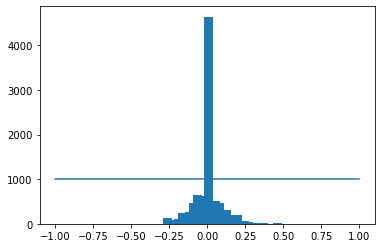

In [8]:
plt.bar(center,hist,width = 0.06)
plt.plot((-1,1),(samplesPerBin,samplesPerBin))
plt.show()

In [9]:
# remove the extra data
removeIndexList = []
for j in range(nBins):
    binDataList = []
    for i in range (len(data['Steering'])):
        if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
            binDataList.append(i)
    binDataList = shuffle(binDataList) ## it will help to shuffle the value
    binDataList = binDataList[samplesPerBin:]
    removeIndexList.extend(binDataList)
print('Removed Images : ', len(removeIndexList))
data.drop(data.index[removeIndexList],inplace=True) ## now we have to remove those indexes from orginal data
print('Remaining Images : ', len(data))

Removed Images :  3645
Remaining Images :  6607


<function matplotlib.pyplot.show(*args, **kw)>

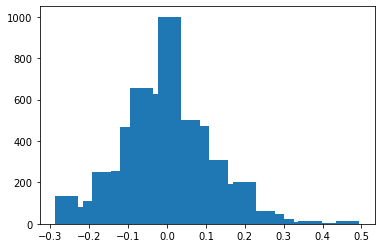

In [10]:
hist, _ = np.histogram(data['Steering'],nBins)
plt.bar(center,hist,width=0.06)
plt.show

## Step4 : Preparing for Processing

In [11]:
imagesPath = []
steering = []

for i in range(len(data)):
    indexData = data.iloc[i]
    #print(indexData)
    imagesPath.append(os.path.join(path,'IMG',indexData[0]))
    #print(os.path.join(path,'IMG',indexData[0]))
    steering.append(float(indexData[3]))
imagesPath = np.asarray(imagesPath)
steerings = np.asarray(steering)

print(imagesPath[0],' -> ',steerings[0])

myData\IMG\center_2021_11_15_18_26_55_570.jpg  ->  0.0


## Step 5 : Splitting of Data (Training, Validation)

In [12]:
xTrain, xVal, yTrain, yVal  = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)
## Traning => 80% and Validation => 20%

print('Total Traning images : ', len(xTrain))
print('Total Validation images : ',len(xVal))

Total Traning images :  5285
Total Validation images :  1322


## Step 6 : Images Augmentation

#### *PAN*

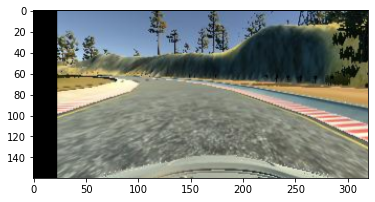

In [17]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)

    # Translation
    pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
    img = pan.augment_image(img)
    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *ZOOM*

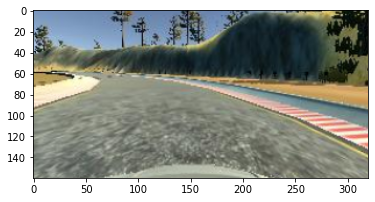

In [20]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    zoom = iaa.Affine(scale=(1,1.2))
    img = zoom.augment_image(img)

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *BRIGHTNESS*

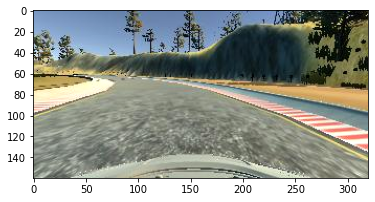

In [23]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    brightness = iaa.Multiply((0.4,1.2))
    img = brightness.augment_image(img)

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *FLIP*

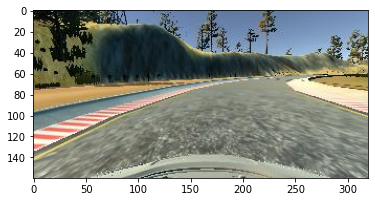

In [16]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)
    
    img = cv2.flip(img,1)
    steering = -steering

    return img, steering

imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

#### *FINAL TOUCH OF RANDOMNESS IN IMAGE AUGMENTATION*

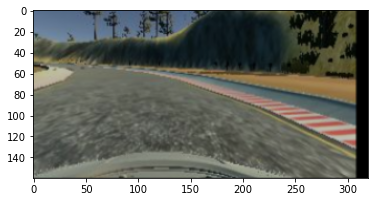

In [27]:
def augmentImage(ImgPath, steering):
    img = mpimg.imread(ImgPath)

    # PAN
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1,0.1), 'y':(-0.1,0.1)})
        img = pan.augment_image(img)

    # ZOOM
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)

    # BRIGHTNESS
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.4,1.2))
        img = brightness.augment_image(img)

    # FLIP
    if np.random.rand() < 0.5:
        img = cv2.flip(img,1)
        steering = -steering

    return img, steering


imgRe, st = augmentImage('test.jpg',0)
plt.imshow(imgRe)
plt.show()

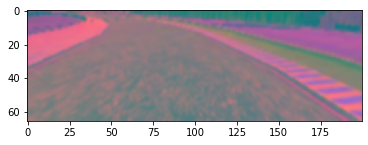

In [30]:
def preProcessing(img):
    img = img[60:135,:,:] # CROP
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV) # RGB -> YUV
    img = cv2.GaussianBlur(img,(3,3),0) # BLUR
    img = cv2.resize(img,(200,66)) # RESIZE
    img = img/255 # NORMALIZATION
    
    return img

imgRe = preProcessing(mpimg.imread('test.jpg'))
plt.imshow(imgRe)
plt.show()